In [7]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('HeartDiseaseTrain-Test.csv')

# Menampilkan 5 baris pertama dari dataset
print(data.head())


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [9]:
from statistics import mode

# Kolom-kolom numerik yang perlu diisi
numerical_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

# Mengisi nilai yang hilang dengan median untuk kolom numerik
for col in numerical_columns:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# Kolom-kolom kategorikal yang perlu diisi
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

# Mengisi nilai yang hilang dengan mode untuk kolom kategorikal
for col in categorical_columns:
    mode_value = mode(data[col].dropna())  # Menggunakan mode untuk mengisi nilai yang hilang
    data[col] = data[col].fillna(mode_value)

# Memeriksa nilai yang hilang setelah diisi
missing_values = data.isna().sum()
print(missing_values)


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Kolom-kolom kategorikal yang perlu dikonversi
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

# Mengonversi kolom kategorikal ke angka
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Menampilkan 5 baris pertama setelah konversi
print(data.head())


   age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2             168                        0   
1                    0         1             155                        1   
2                    1         2             125                        1   
3                    1         2             161                        0   
4                    0         2             106                        0   

   oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  target  
0      1.0      0                              3  

In [13]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = data.drop('target', axis=1)  # Fitur
y = data['target']  # Target

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memeriksa beberapa nilai pertama setelah standarisasi
print(X_scaled[:5])


[[-2.68436584e-01  6.61504088e-01  8.64114193e-01 -3.77635519e-01
  -6.59332089e-01  4.18877924e-01  9.73266096e-01  8.21320521e-01
  -7.12287120e-01 -6.08883932e-02 -9.95433338e-01 -2.26402779e-03
   1.15588044e+00]
 [-1.58157025e-01  6.61504088e-01  8.64114193e-01  4.79107303e-01
  -8.33861171e-01 -2.38733039e+00 -9.19708758e-01  2.55967905e-01
   1.40392824e+00  1.72713707e+00  2.24367514e+00  7.71278801e-01
   1.15588044e+00]
 [ 1.71659547e+00  6.61504088e-01  8.64114193e-01  7.64688244e-01
  -1.39623266e+00  4.18877924e-01  9.73266096e-01 -1.04869198e+00
   1.40392824e+00  1.30141672e+00  2.24367514e+00  7.71278801e-01
   1.15588044e+00]
 [ 7.24079443e-01  6.61504088e-01  8.64114193e-01  9.36036809e-01
  -8.33861171e-01  4.18877924e-01  9.73266096e-01  5.16899882e-01
  -7.12287120e-01 -9.12329090e-01 -9.95433338e-01 -1.54934969e+00
   1.15588044e+00]
 [ 8.34359002e-01 -1.51170646e+00  8.64114193e-01  3.64874927e-01
   9.30821772e-01 -2.38733039e+00  9.73266096e-01 -1.87497657e+00


In [15]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Memeriksa ukuran data pelatihan dan pengujian
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(820, 13) (205, 13) (820,) (205,)


In [17]:
from sklearn.linear_model import LogisticRegression #model klasifikasi yang menggunakan regresi logistik. 
from sklearn.metrics import accuracy_score #untuk menghitung akurasi model, yaitu rasio prediksi yang benar terhadap jumlah total data.

# Menggunakan Logistic Regression untuk model
model = LogisticRegression(max_iter=1000) #membuat model regresi logistik dengan iterasi maksimum sebanyak 1000 agar proses optimasi dapat mencapai konvergensi.

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 79.51%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12188\1693427683.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis') #membuat bar plot untuk menghitung jumlah setiap kategori dalam kolom target.


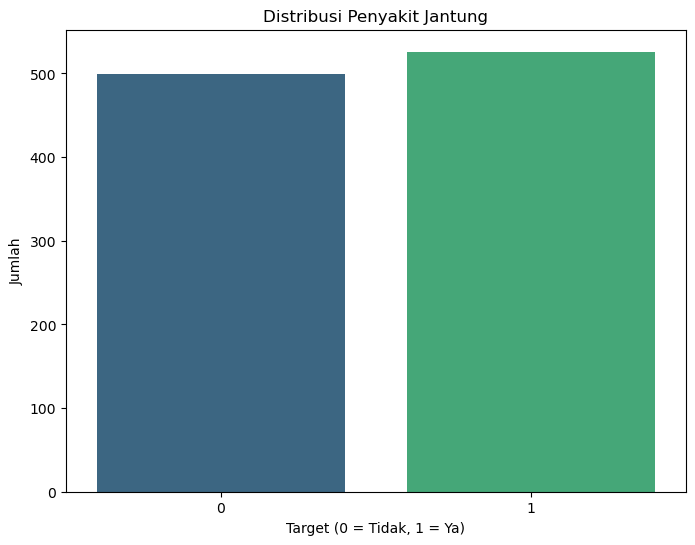

In [19]:
import matplotlib.pyplot as plt #untuk membuat grafik atau visualisasi.
import seaborn as sns #Library yang dibangun di atas Matplotlib, menawarkan visualisasi data yang lebih estetis dan mudah digunakan.

# Grafik 1: Bar Plot untuk distribusi jumlah target (Heart Disease: 0 = No, 1 = Yes)
plt.figure(figsize=(8, 6)) #untuk menentukan ukuran figur/grafik dengan lebar 8 inci dan tinggi 6 inci. #uembuat bar plot untuk menghitung jumlah setiap kategori dalam kolom target.
sns.countplot(x='target', data=data, palette='viridis') #membuat bar plot untuk menghitung jumlah setiap kategori dalam kolom target.
plt.title('Distribusi Penyakit Jantung') #untuk menambahkan judul untuk grafik.
plt.xlabel('Target (0 = Tidak, 1 = Ya)') #untuk menambahkan label untuk sumbu x dengan keterangan kategori target (0 = Tidak memiliki penyakit jantung, 1 = Memiliki penyakit jantung).
plt.ylabel('Jumlah') #untuk menambahkan label untuk sumbu y, yaitu jumlah atau frekuensi data untuk setiap kategori.
plt.show() #untuk menampilkan grafik ke layar.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12188\1907197231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=data, palette='Set2') #untuk membuat boxplot, yaitu grafik yang digunakan untuk menampilkan distribusi data numerik berdasarkan statistik deskriptif (seperti median, kuartil, dan outlier).


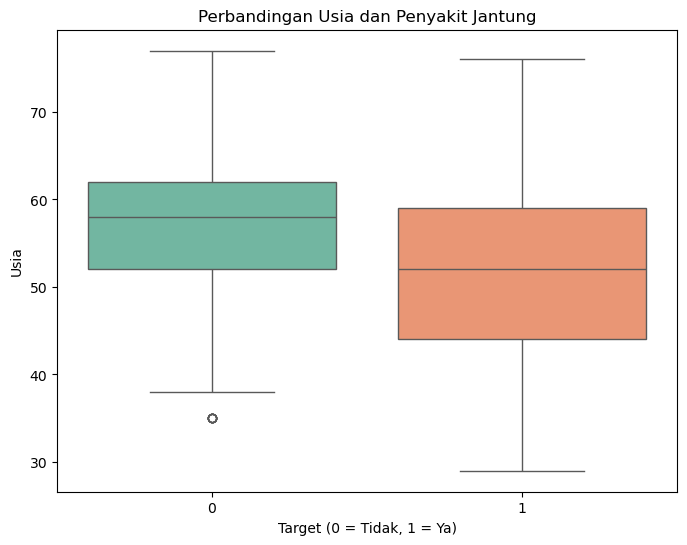

In [20]:
# Grafik 2: Boxplot untuk membandingkan kolom 'age' dan 'target' (Membandingkan usia dengan apakah ada penyakit jantung)
plt.figure(figsize=(8, 6)) #untuk membuat figur baru dengan ukuran 8 inci (lebar) dan 6 inci (tinggi).
sns.boxplot(x='target', y='age', data=data, palette='Set2') #untuk membuat boxplot, yaitu grafik yang digunakan untuk menampilkan distribusi data numerik berdasarkan statistik deskriptif (seperti median, kuartil, dan outlier).
plt.title('Perbandingan Usia dan Penyakit Jantung') #untuk menambahkan judul "Perbandingan Usia dan Penyakit Jantung" ke grafik.
plt.xlabel('Target (0 = Tidak, 1 = Ya)') #untuk menambahkan label untuk sumbu x, yaitu Target (0 = Tidak, 1 = Ya).
plt.ylabel('Usia') #untuk menambahkan label untuk sumbu y, yaitu Usia, untuk menunjukkan rentang usia yang dibandingkan.
plt.show() #untuk menampilkan grafik ke layar.


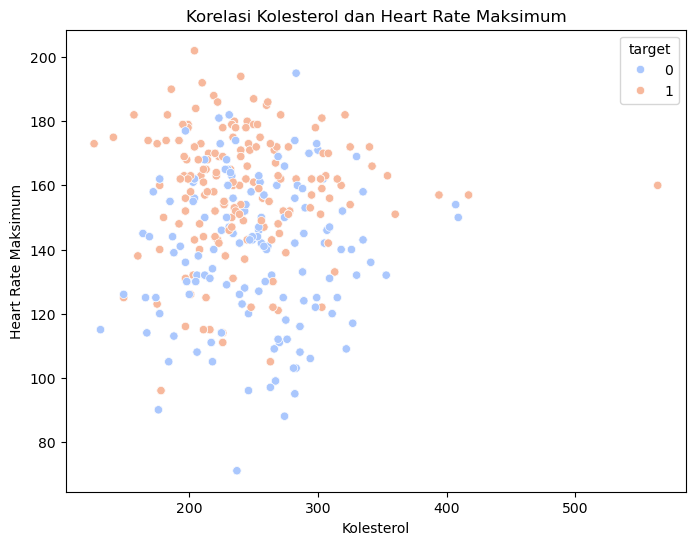

In [21]:
# Grafik 3: Scatter Plot untuk 'cholestoral' vs 'Max_heart_rate'
plt.figure(figsize=(8, 6)) #untuk membuat figur baru dengan ukuran 8 inci (lebar) dan 6 inci (tinggi).
sns.scatterplot(x='cholestoral', y='Max_heart_rate', hue='target', data=data, palette='coolwarm') #untuk membuat scatter plot, yaitu grafik yang digunakan untuk melihat hubungan atau korelasi antara dua variabel numerik.
plt.title('Korelasi Kolesterol dan Heart Rate Maksimum') #untuk membuat scatter plot, yaitu grafik yang digunakan untuk melihat hubungan atau korelasi antara dua variabel numerik.
plt.xlabel('Kolesterol') #untuk menambahkan judul "Korelasi Kolesterol dan Heart Rate Maksimum" untuk menggambarkan isi grafik.
plt.ylabel('Heart Rate Maksimum') #untuk memberikan label untuk sumbu y dengan teks "Heart Rate Maksimum".
plt.show() # untuk enampilkan grafik scatter plot ke layar.


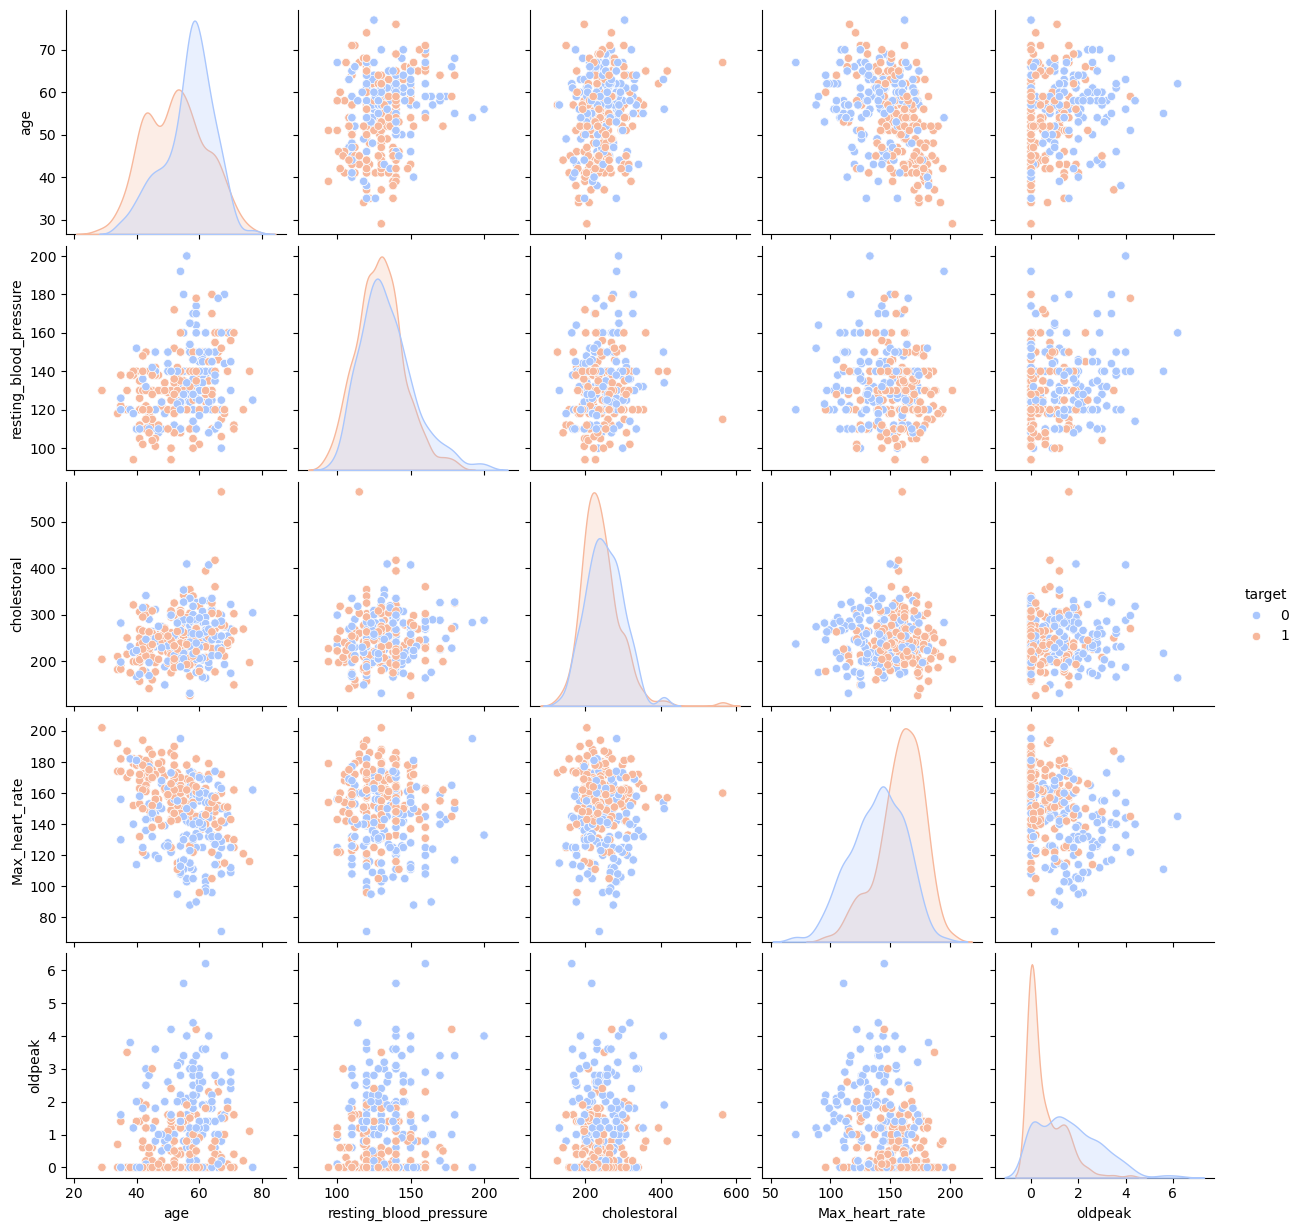

In [22]:
# Grafik 5: Pairplot untuk melihat korelasi antar fitur numerik
sns.pairplot(data[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'target']], hue='target', palette='coolwarm')
plt.show()


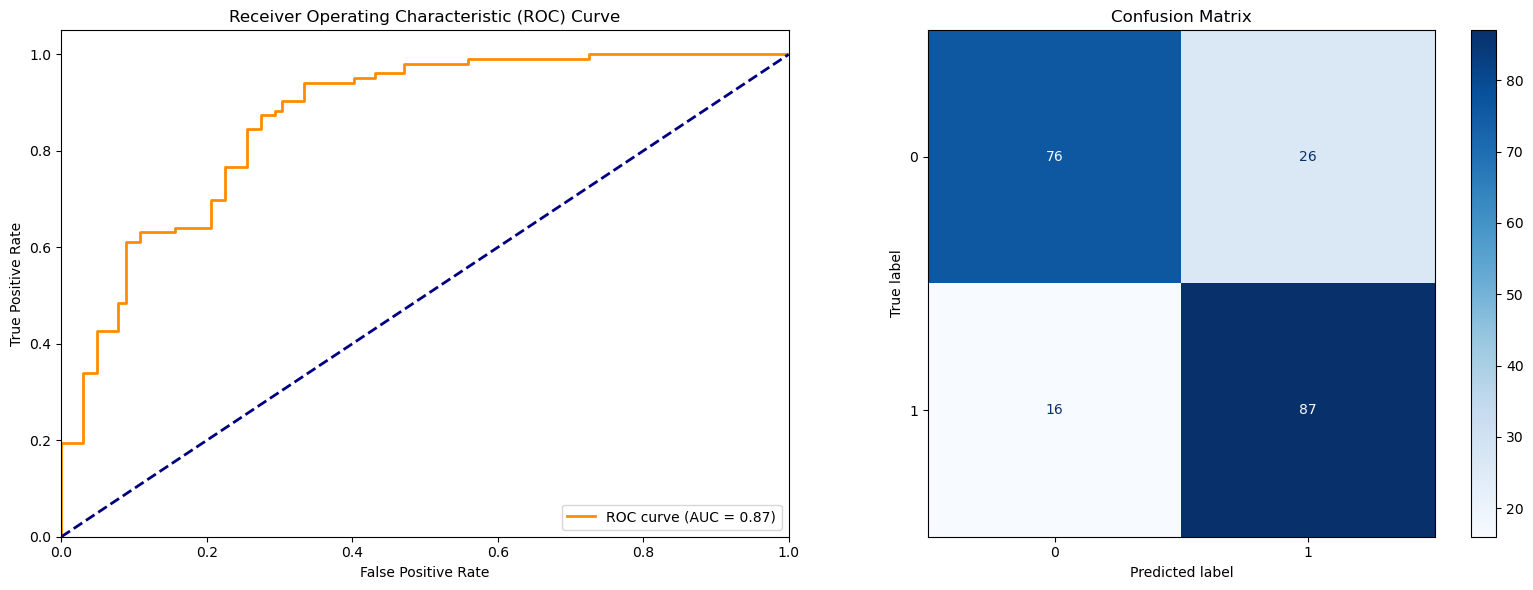

In [39]:
#import library untuk visualisasi
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Probabilitas prediksi untuk ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]

# Menghitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Menghitung Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Membuat visualisasi berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')

# Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()
